### Exponential Moving Average (EMA)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web

In [2]:
df = pd.read_csv('PG_Data.csv', usecols=['Date', 'Close'], parse_dates=True)

In [21]:
# df = pd.read_csv('PG_Data.csv',index_col=['Date'],usecols=['Date','Close'],parse_dates=True)

In [3]:
df.dtypes

Date      object
Close    float64
dtype: object

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df = df[df['Date'] > '2020-12-31']

In [6]:
df.info()  # checking the details of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 14853 to 15403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    551 non-null    datetime64[ns]
 1   Close   551 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.9 KB


In [7]:

df.head(10)

,Date,Close
14853,2021-01-04,137.820007
14854,2021-01-05,138.699997
14855,2021-01-06,140.160004
14856,2021-01-07,138.850006
14857,2021-01-08,138.789993
14858,2021-01-11,137.850006
14859,2021-01-12,137.050003
14860,2021-01-13,137.259995
14861,2021-01-14,135.800003
14862,2021-01-15,134.779999


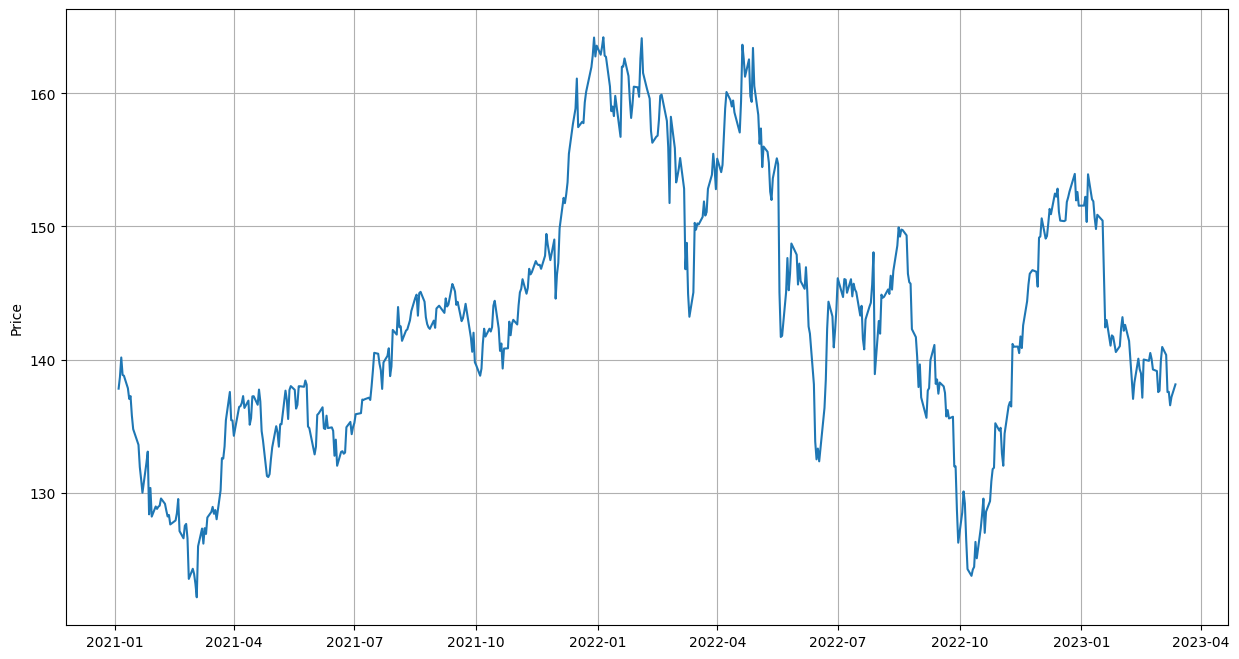

In [27]:
plt.figure(figsize= (15, 8))
plt.plot(df['Date'], df['Close'])
# df.plot(figsize = (15,8))
plt.grid()
plt.ylabel("Price")
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 14853 to 15403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    551 non-null    datetime64[ns]
 1   Close   551 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.9 KB


In [9]:
df['EMA20'] = df['Close'].ewm(span = 20, adjust = False).mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 14853 to 15403
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    551 non-null    datetime64[ns]
 1   Close   551 non-null    float64       
 2   EMA20   551 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 17.2 KB


In [10]:
df['EMA50'] = df['Close'].ewm(span = 50, adjust = False).mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 14853 to 15403
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    551 non-null    datetime64[ns]
 1   Close   551 non-null    float64       
 2   EMA20   551 non-null    float64       
 3   EMA50   551 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 21.5 KB


In [11]:
df['Signal'] = 0.0  
df['Signal'] = np.where(df['EMA20'] > df['EMA50'], 1.0, 0.0)

In [12]:
df['Position'] = df['Signal'].diff()

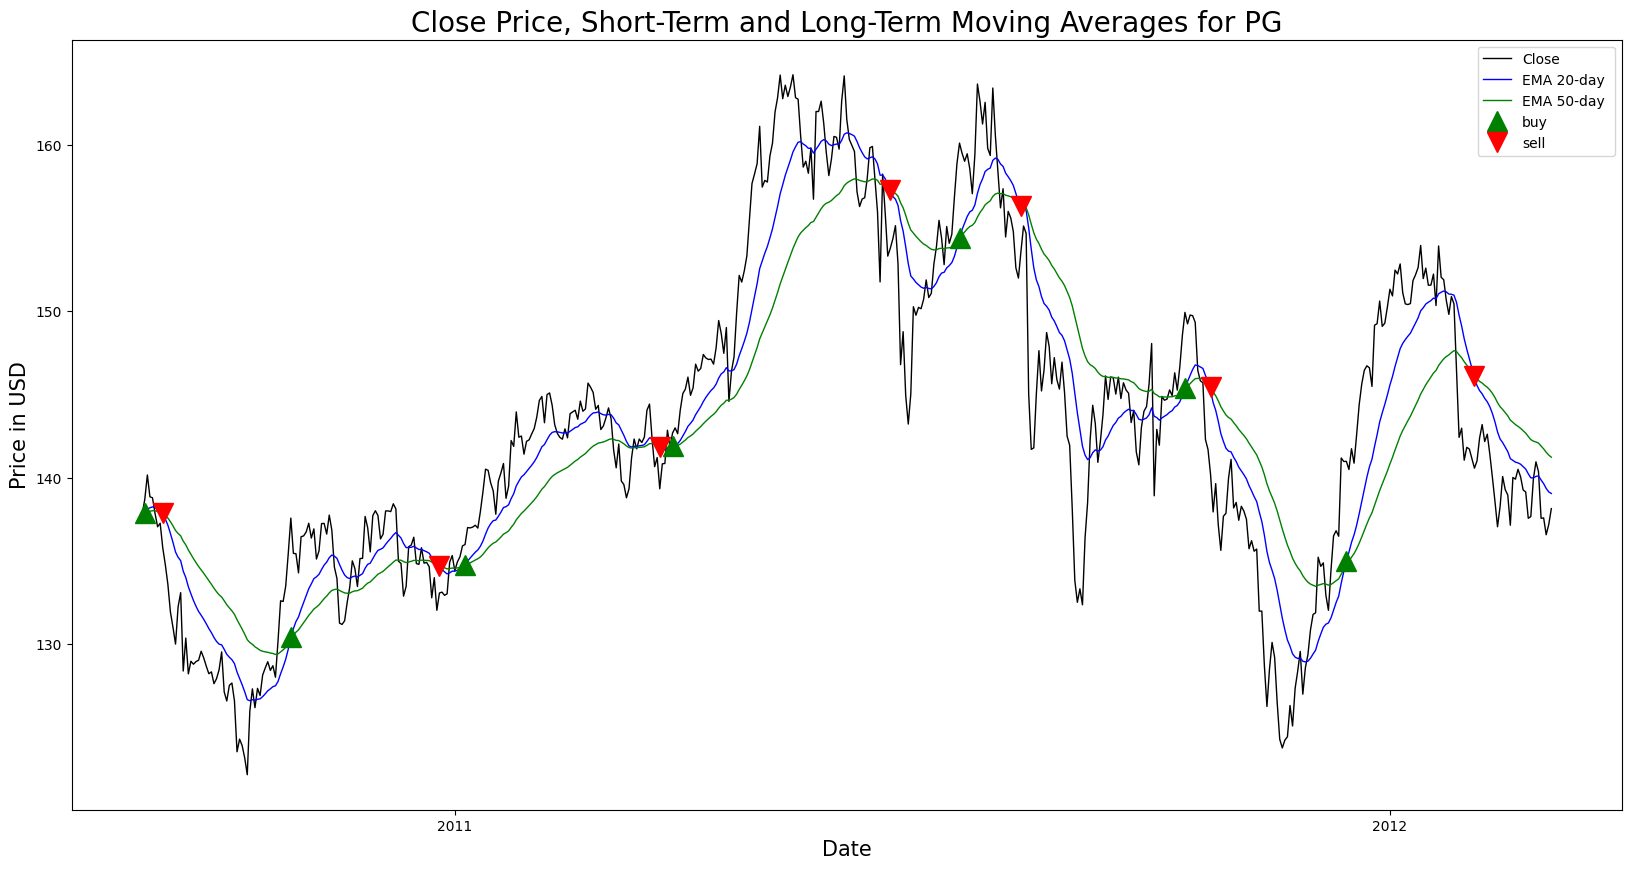

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize = (20, 10))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', lw = 1, label = 'Close')  
df['EMA20'].plot(color = 'b', lw = 1, label = 'EMA 20-day ') 
df['EMA50'].plot(color = 'g', lw = 1, label = 'EMA 50-day ')
# plot ‘buy’ and 'sell' signals
plt.plot(df[df['Position'] == 1].index, 
         df['EMA20'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.plot(df[df['Position'] == -1].index, 
         df['EMA50'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')

date_form = DateFormatter("%Y")
year_locator = YearLocator(base=1)
plt.gca().xaxis.set_major_locator(year_locator)
plt.gca().xaxis.set_major_formatter(date_form)

plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('Close Price, Short-Term and Long-Term Moving Averages for PG' , fontsize = 20)
plt.legend()
plt.figure()
plt.show()

In [14]:
df_position = df[(df['Position'] == 1) | (df['Position'] == -1)]
df_position['Position'] = df_position['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_position, headers = 'keys', tablefmt = 'psql'))

+-------+---------------------+---------+---------+---------+----------+------------+
|       | Date                |   Close |   EMA20 |   EMA50 |   Signal | Position   |
|-------+---------------------+---------+---------+---------+----------+------------|
| 14854 | 2021-01-05 00:00:00 |  138.7  | 137.904 | 137.855 |        1 | Buy        |
| 14861 | 2021-01-14 00:00:00 |  135.8  | 137.807 | 137.857 |        0 | Sell       |
| 14911 | 2021-03-29 00:00:00 |  137.57 | 130.445 | 130.32  |        1 | Buy        |
| 14969 | 2021-06-21 00:00:00 |  133.07 | 134.633 | 134.712 |        0 | Sell       |
| 14979 | 2021-07-06 00:00:00 |  135.98 | 134.771 | 134.705 |        1 | Buy        |
| 15055 | 2021-10-21 00:00:00 |  139.33 | 141.86  | 141.862 |        0 | Sell       |
| 15060 | 2021-10-28 00:00:00 |  142.68 | 141.876 | 141.859 |        1 | Buy        |
| 15145 | 2022-03-02 00:00:00 |  153.79 | 157.163 | 157.272 |        0 | Sell       |
| 15172 | 2022-04-08 00:00:00 |  160.1  | 154.421 | 15